In [9]:
import pandas as pd
import matplotlib.pyplot as plt
import morton

### Constants

In [10]:
OFFSET = 10
FACTOR_MULTIPLY = 10000

### Read file

In [11]:
#df = pd.read_csv('data/lane_changes/20Hz/lane_change_1.csv', sep=';')
df = pd.read_csv('data/lane_changes/normal_drive.csv', sep=';')
#df['ts'] = (df['sampleTimeStamp.seconds']*1000000)+df['sampleTimeStamp.microseconds']
#df = df.drop(columns=['sampleTimeStamp.seconds', 'sampleTimeStamp.microseconds'])

In [12]:
# Reading other files for CSP analysis of different maneouvres
# Plotting braking_cut shows us that certain parts of the resulting CSP are the same as with the lane change.
#df = pd.read_csv('data/braking_cut.csv', sep=';')
#df = pd.read_csv('data/braking_and_lanechange.csv', sep=';')

### Apply constants

In [13]:
df['accel_lon']=df['accel_lon'].add(OFFSET)
df['accel_trans']=df['accel_trans'].add(OFFSET)
df['accel_down']=df['accel_down'].add(OFFSET)

df['accel_lon'] = df.apply(lambda x: int(x['accel_lon']*FACTOR_MULTIPLY) , axis=1)
df['accel_trans'] = df.apply(lambda x: int(x['accel_trans']*FACTOR_MULTIPLY) , axis=1)
df['accel_down'] = df.apply(lambda x: int(x['accel_down']*FACTOR_MULTIPLY) , axis=1)

### Morton indexing

In [14]:
#resolution = 18; dimension = 2
#hilbert_curve = HilbertCurve(resolution, dimension, n_procs=-1)

#points = df[['accel_lon','accel_trans']].to_numpy()

# Generate Hilbert index
#distances = hilbert_curve.distances_from_points(points)

# Add Hilbert index to 'hilbert' column
#df_hilbert = pd.concat([df, pd.DataFrame(distances, columns = ['hilbert'] )], axis=1)

m = morton.Morton(dimensions=2, bits=18)

def set_value(row):
    return m.pack(int(row['accel_lon']), int(row['accel_trans']))

df['morton'] = df.apply(set_value, axis=1)


### Morton Plots

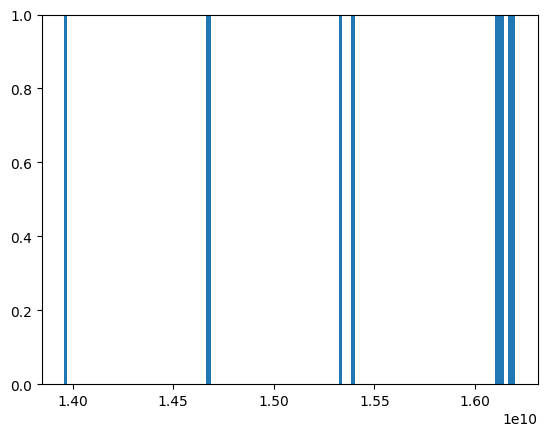

In [15]:
# 'bins' explained: https://www.metabase.com/glossary/bin

# What 'bins' value is best?
plt.hist(df['morton'], bins=200)

min = df['morton'].min()
max = df['morton'].max()
max = 30000000000
#max = 20000000000

# limit y axis to 1 to show binary presence of data point
plt.ylim(0,1)
#plt.xlim(1,max)
# limit x axis to take only "lane change relevant" data
#plt.xlim(9000000000,13000000000)

plt.show()

### Scatter Plots

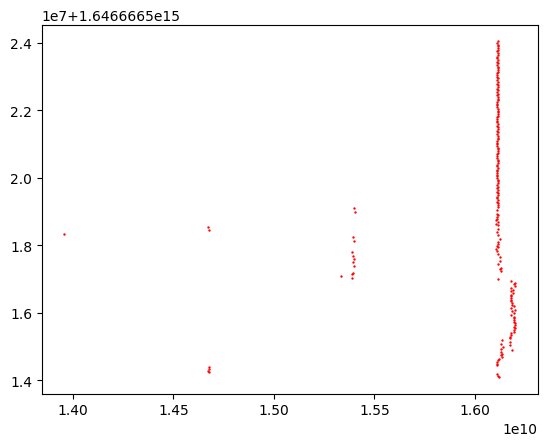

In [17]:
plt.scatter(x=df['morton'],y=df['ts'], c='red', s=0.5)
plt.savefig('MortonScatterTest.png', transparent=True)

In [ ]:
# 2D-plot with timestamp as color gradient
df.plot(kind='scatter',x='accel_lon',y='accel_trans',color=df['ts'])

In [ ]:
#creating 3D-Plot
ax = plt.axes(projection ="3d")
ax.scatter3D(df['accel_lon'],df['accel_trans'],df['accel_down'], color = "green")

### multidimensional plot

<Axes: xlabel='ts'>

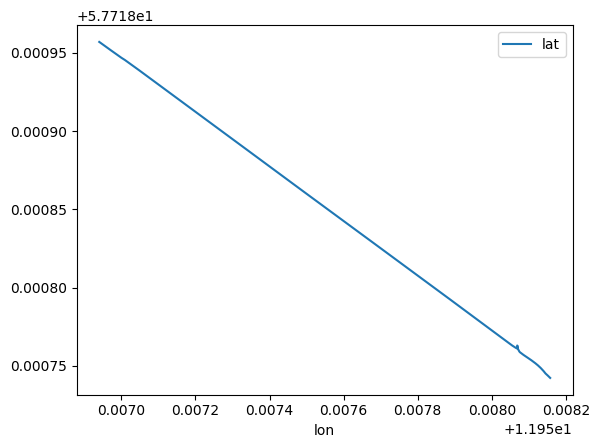

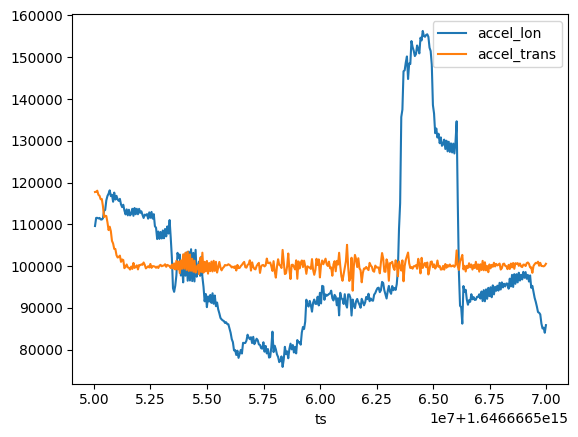

In [27]:
# Plot result
df.plot(x = 'lon', y = 'lat')
df.plot(x = 'ts', y = ['accel_lon', 'accel_trans'])